In [1]:
# Check Scipy version
import scipy
print(scipy.__version__)

1.7.1


Tutorial
https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/

In [2]:
# Import pandas, numpy, scip.stats
import pandas as pd
import numpy as np
from scipy import stats

## One Sample T Test

- According to Reynolds Intellectual Ability Scales, the average VIQ (Verbal IQ scores based on the four Wechsler (1981) subtests) is about 109.

- In our sample data, we have a sample of 40 cases. 
- Let's test if the average VIQ of people is significantly bigger than 109.

In [3]:
# Brain size and weight and IQ data (Willerman et al. 1991)
df = pd.read_csv("brain_size.csv", sep=";", na_values = ".", index_col = 0)

In [4]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [5]:
# H0: mu = 109
# H1: mu > 109

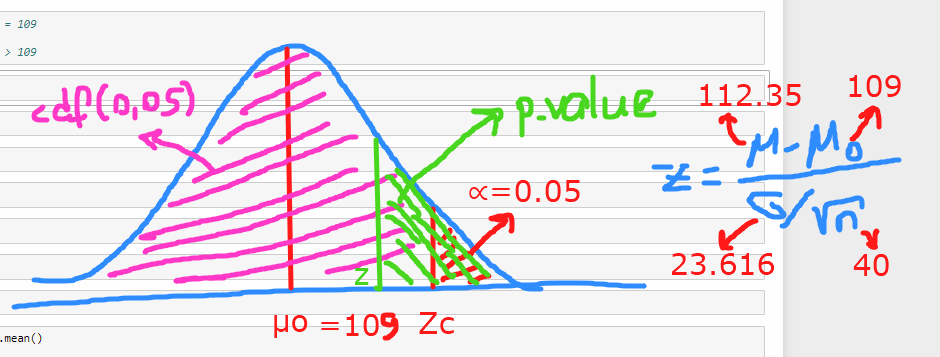

In [6]:
# Calculate the mean of VIQ
xbar = df.VIQ.mean()
xbar

112.35

In [7]:
# Calculate the std of VIQ
s = df.VIQ.std()

In [8]:
df.shape

(40, 7)

In [9]:
# Calculate the test statistic
t_test = (xbar - 109)/(s/np.sqrt(df.shape[0]))

In [10]:
#test statistic
t_test # z skorum

0.8971529586323553

In [11]:
# Calculate p-value
1 - stats.t.cdf(t_test, 39)

0.18757115929257173

In [12]:
# Use stats.ttest_1samp() to calculate the test statistic and p-value
oneSamp = stats.ttest_1samp(df.VIQ, 109, alternative="greater")
oneSamp

# default olarak alternative = two sided. bu yüzden biz alternative  = greater yapıyoruz.

# soruda bana ortalama VIQ (significantly)  > 109 ? diye sorduğu için alternative = greater dedik 

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [13]:
#Display p-value
oneSamp.pvalue

0.1875711592925718

In [14]:
# Compare p-value and alpha
alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


# Independent Samples T Test

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [15]:
#Import arsenic dataset
arsenic = pd.read_csv("arsenic.csv")

In [16]:
arsenic

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [17]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [18]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(arsenic.x1, arsenic.x2)
leveneTest

LeveneResult(statistic=7.7015516672169, pvalue=0.012482954069299166)

In [ ]:
# p-value küçük cıktıgı için h0 reddedilemedi

In [19]:
# average Metro Phoenix
arsenic.x1.mean()

12.5

In [20]:
# average Rural Arizona
arsenic.x2.mean()

27.5

Calculate the T-test for the means of two independent samples of scores.

In [21]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [22]:
# Calculate test statistics using stats.ttest_ind()
indTest = stats.ttest_ind(arsenic.x1, arsenic.x2, equal_var = False) # equal_var = False ortak var.

In [23]:
indTest.statistic

-2.7669395785560558

In [24]:
indTest.pvalue

0.015827284816100885

In [25]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


In [ ]:
# 0.05 anlamlılık seviyesinde yada %95 güven aralığında 2 bölgenin ortalamaları arasında istatistiksel anlamlı bir fark vardır.


In [ ]:
stats.t.ppf(0.025, 18)

# t∝/2 nin cdf'i 0.025 olduğundan ppf(0.025) bana t∝/2 değerini verecektir. (-2.1)

# t∝/2'yi t0 değeri ile kıyaslayarak rejected Null veya fail to reject durumunu belirliyorum.

In [ ]:
t∝/2 = -2.1 

t0 = -2.7669 

t0 < t∝/2  olduğundan rejected the Null!!

ya da 

pvalue (0.012704) değerim 1-cdf(t∝/2) değeri olan 0.025 ten küçük olduğundan Reject the Null

# Paired (Dependent) Samples T Test

## Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use   0.05


In [ ]:
Soru, prozac'ın hastalar üzerinde olumlu etkisi var mı yok mu? (Ho : ilacı kullanmadan önce ve sonra hastalar üzerinde bir fark oluşmamakta)

testimizi difference üzerinde yapacağız.

stats.ttest_rel() fonksiyonunu kullanacağız. fonksiyona ön test ve son test değerlerini giriyoruz.

In [3]:
# read prozac dataset
prozac = pd.read_csv("prozac.csv")

In [4]:
prozac

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [5]:
# H0: d_bar = 0
# H1: d_bar > 0

In [6]:
# Calculate test statistics using stats.ttest_rel()  
# moodpost - moodpre
pairedtest = stats.ttest_rel(prozac.moodpost, prozac.moodpre, alternative="greater")
pairedtest

# datasetimde son testimden ilk testi çıkartılmıştır ama python fonksiyonunda ilk testten son test çıkartılıyor.

# o zaman  alternative = greater değil less demen lazım. buna dikkat et.

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394244)

In [30]:
# moodpre - moodpost
# H0: d_bar = 0
# H1: d_bar < 0
stats.ttest_rel(prozac.moodpre, prozac.moodpost, alternative="less")

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394244)

In [ ]:
dataframe'imde moodpost'tan moodpre çıkartılarak fark bulunmuş.
bu yüzden stats.ttest_rel(prozac["moodpost"], prozac["moodpre"], alternative = "greater") şekilnde 
pre ile post u yer değiştirerek kullanabilirim veya alternative=less girerim. 

In [31]:
# Decision
alpha = 0.05

if pairedtest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [ ]:
# İstatistiksel test sonucu 0.05 anlamlılık seviyesinde prozac tedavisi, depresif hastalarda olumlu sonuc vermiştir.